In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_context(font_scale=1.5)

df = pd.read_csv('../data.csv')
print('Amostras: {} \nColunas: {}'.format(df.shape[0], df.shape[1]))

Amostras: 880 
Colunas: 67


In [36]:
harmonico1 = [col for col in df.columns if '1h' in col]
harmonico2 = [col for col in df.columns if '2h' in col]
harmonico3 = [col for col in df.columns if '3h' in col]
harmonicos = list(set().union(harmonico1, harmonico2, harmonico3))

df = df[list(set().union(['severidade', 'rotacao_calc', 'condicao'], harmonicos))]
df.head()

,tg2_1h,rad2_1h,ax1_1h,tg1_2h,rad1_3h,ax1_3h,ax2_3h,ax1_2h,tg2_3h,rad1_2h,...,tg2_2h,severidade,tg1_3h,tg1_1h,rad2_2h,rad1_1h,ax2_2h,rotacao_calc,condicao,rad2_3h
0,8.995064,3.037683,12.449576,0.187340,0.929641,10.527471,14.398470,1.259489,4.231604,1.308704,...,2.953858,0.5,0.520767,0.461724,0.709721,1.052121,8.198523,12.0,horizontal-misalignment,1.526661
1,9.474440,1.712058,12.766118,0.164511,1.084714,13.032338,10.490609,0.988185,3.659212,2.174825,...,4.411897,0.5,0.506327,0.346181,0.622227,1.622110,13.169996,13.2,horizontal-misalignment,0.503709
2,11.127159,1.987015,14.641137,0.138415,1.151145,12.802041,10.342368,0.608318,3.640092,2.484631,...,5.292986,0.5,0.532157,0.252124,0.729362,1.595115,15.837603,14.2,horizontal-misalignment,0.505940
3,9.787049,1.996131,11.691759,0.099867,0.839029,8.018672,6.185627,0.109013,2.064461,1.752742,...,3.639946,0.5,0.416054,0.151894,0.571161,1.367533,12.124025,15.0,horizontal-misalignment,0.320734
4,11.191638,2.462926,11.575027,0.125017,1.020284,8.702898,7.074467,0.527295,2.273519,1.563468,...,3.507578,0.5,0.419435,0.076388,0.802715,1.184740,12.409616,16.0,horizontal-misalignment,0.317489


In [42]:
df_mancal1 = df.drop([col for col in harmonicos if '2_' in col], axis=1).copy()
df_mancal1['mancal'] = 1
df_mancal1.rename(lambda col: col.replace('1_', '_'), axis=1, inplace=True)

df_mancal2 = df.drop([col for col in harmonicos if '1_' in col], axis=1).copy()
df_mancal2['mancal'] = 2
df_mancal2.rename(lambda col: col.replace('2_', '_'), axis=1, inplace=True)

df_long = pd.concat([df_mancal1, df_mancal2])
df_long.head()

,ax_1h,tg_2h,rad_3h,ax_3h,ax_2h,rad_2h,severidade,tg_3h,tg_1h,rad_1h,rotacao_calc,condicao,mancal
0,12.449576,0.187340,0.929641,10.527471,1.259489,1.308704,0.5,0.520767,0.461724,1.052121,12.0,horizontal-misalignment,1
1,12.766118,0.164511,1.084714,13.032338,0.988185,2.174825,0.5,0.506327,0.346181,1.622110,13.2,horizontal-misalignment,1
2,14.641137,0.138415,1.151145,12.802041,0.608318,2.484631,0.5,0.532157,0.252124,1.595115,14.2,horizontal-misalignment,1
3,11.691759,0.099867,0.839029,8.018672,0.109013,1.752742,0.5,0.416054,0.151894,1.367533,15.0,horizontal-misalignment,1
4,11.575027,0.125017,1.020284,8.702898,0.527295,1.563468,0.5,0.419435,0.076388,1.184740,16.0,horizontal-misalignment,1


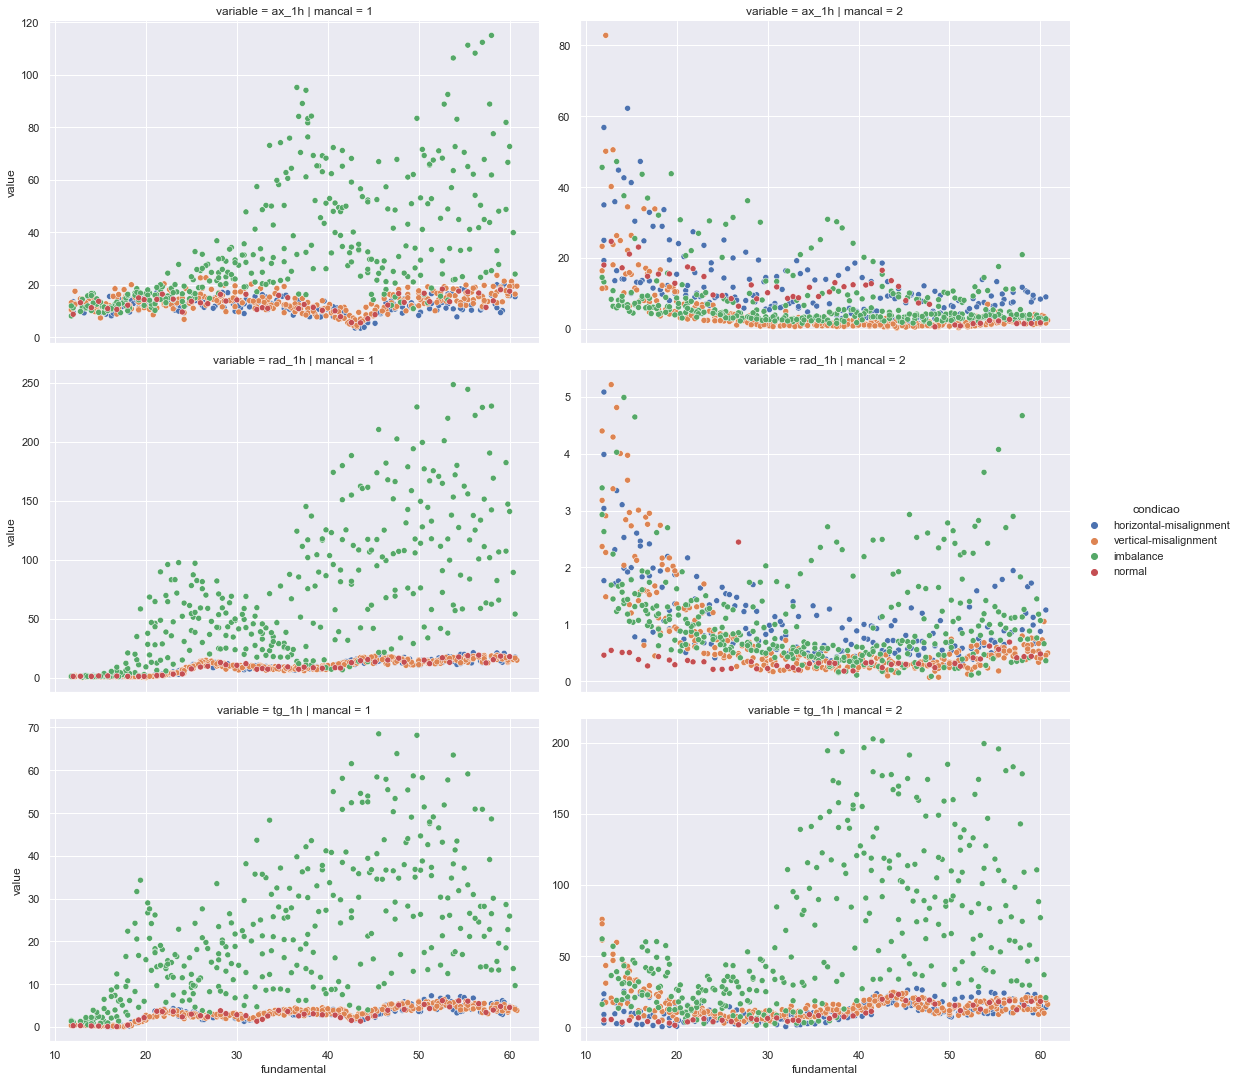

In [47]:
df_h1 = df_long.melt(id_vars=['rotacao_calc', 'condicao', 'mancal'], value_vars=['ax_1h', 'rad_1h', 'tg_1h'])

sns.relplot(data=df_h1, col='mancal', row='variable', y='value', x='rotacao_calc', hue='condicao', aspect=1.5, facet_kws={'sharey': False, 'sharex': True})

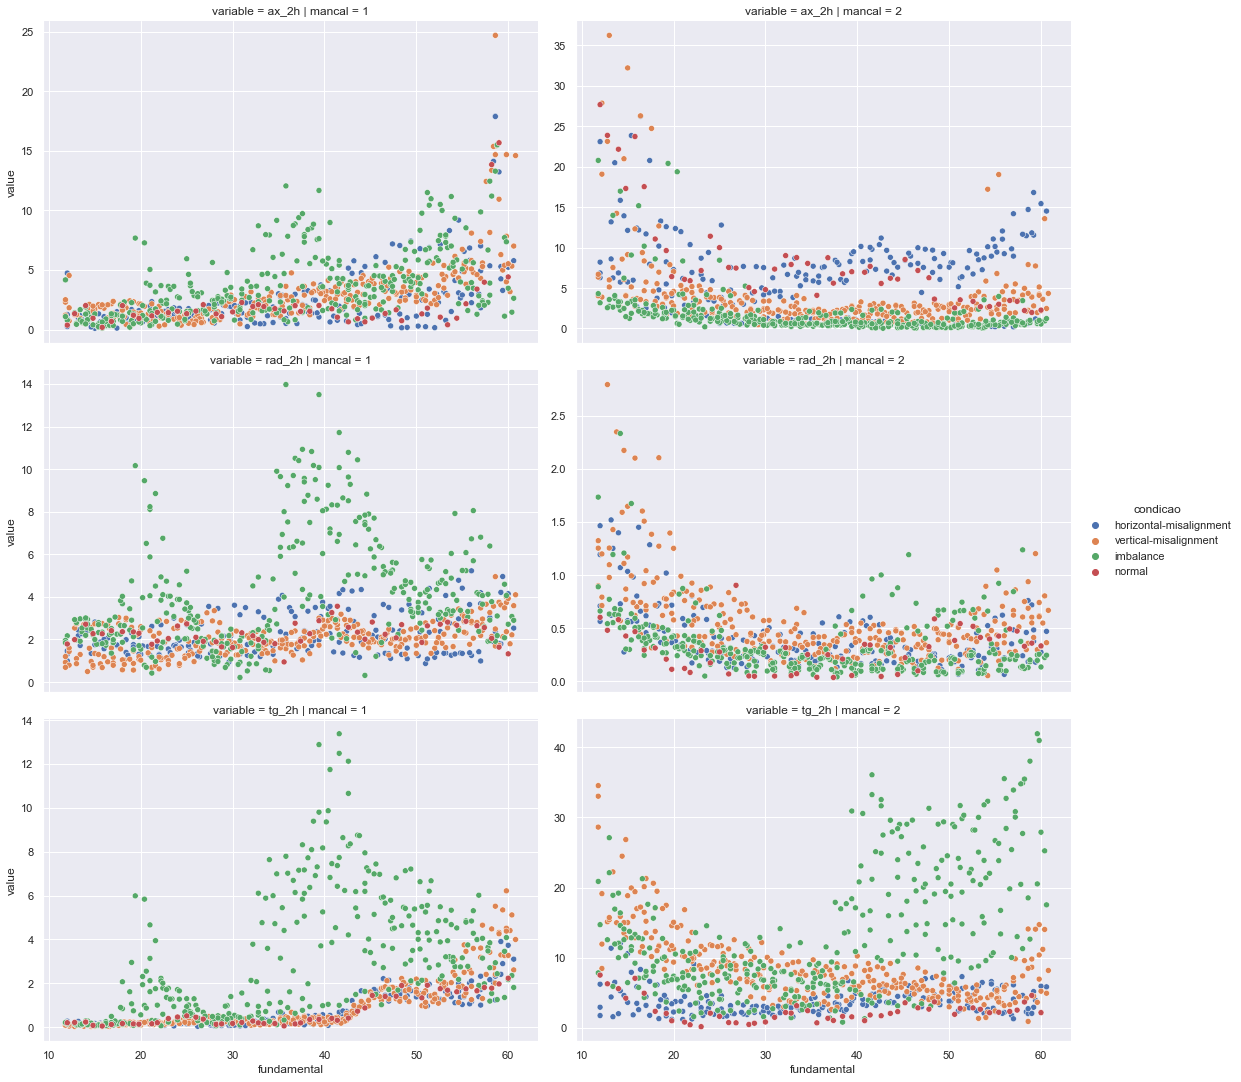

In [48]:
df_h1 = df_long.melt(id_vars=['rotacao_calc', 'condicao', 'mancal'], value_vars=['ax_2h', 'rad_2h', 'tg_2h'])

sns.relplot(data=df_h1, col='mancal', row='variable', y='value', x='rotacao_calc', hue='condicao', aspect=1.5, facet_kws={'sharey': False, 'sharex': True})

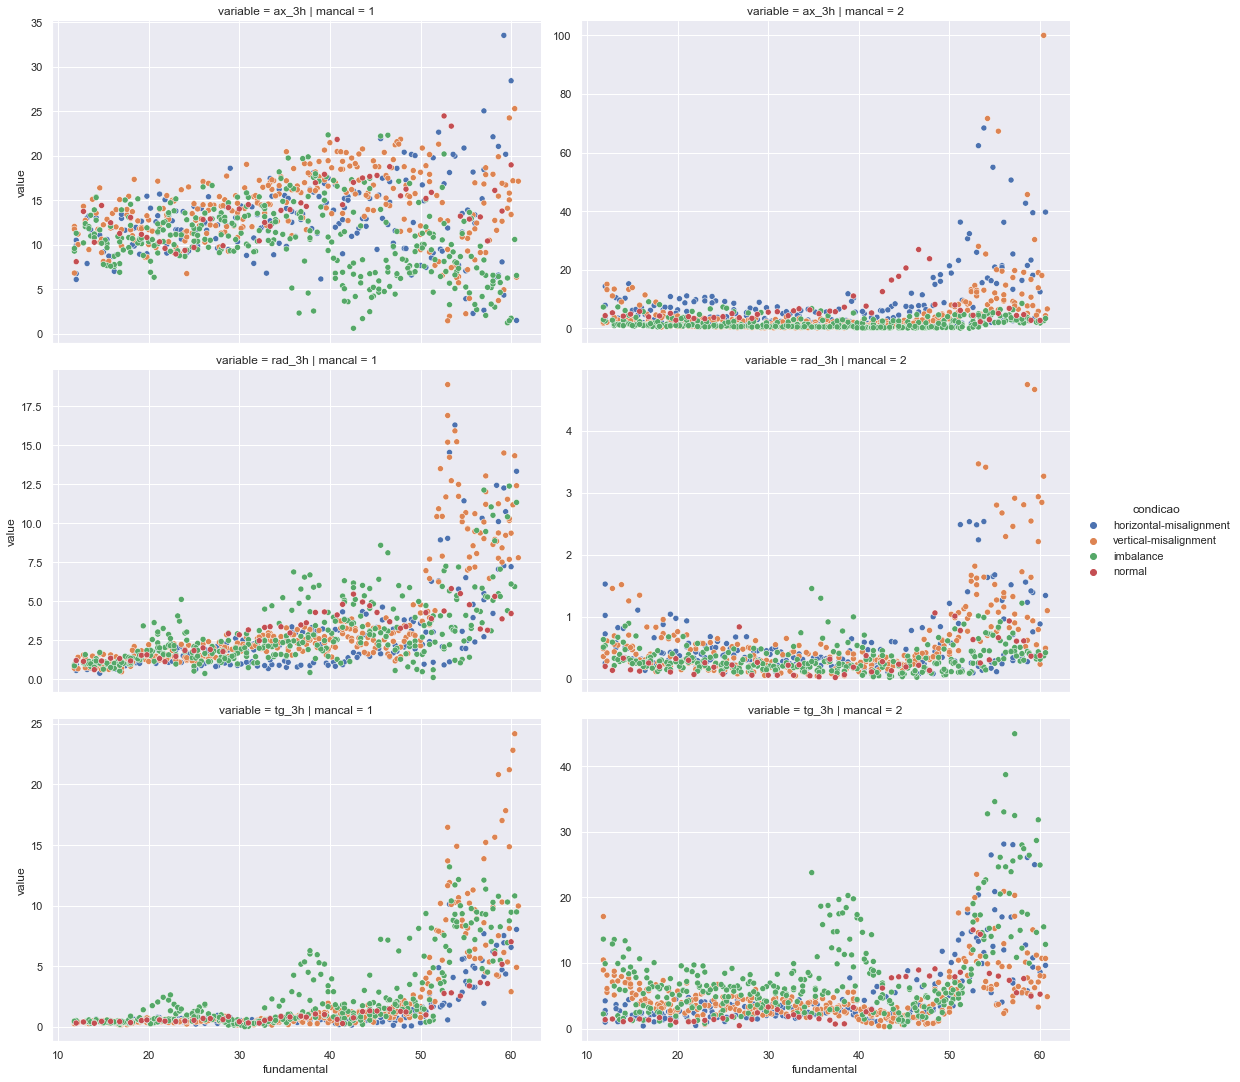

In [49]:
df_h1 = df_long.melt(id_vars=['rotacao_calc', 'condicao', 'mancal'], value_vars=['ax_3h', 'rad_3h', 'tg_3h'])

sns.relplot(data=df_h1, col='mancal', row='variable', y='value', x='rotacao_calc', hue='condicao', aspect=1.5, facet_kws={'sharey': False, 'sharex': True})